In [302]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [303]:
faker_data = pd.DataFrame({'x': np.arange(14 * 12)})
faker_data['value'] = faker_data['x'].apply(
    lambda x: (1800.08 + 0.43 * x - 20.04 * np.sin(np.pi * x / 6 + 255.69) + np.random.random(1) * 10)[
        0])  # 这里最后面是np.random.random(1) * 15添加的随机数。
faker_data.head(3)

,x,value
0,0,1823.982701
1,1,1823.590444
2,2,1819.505285


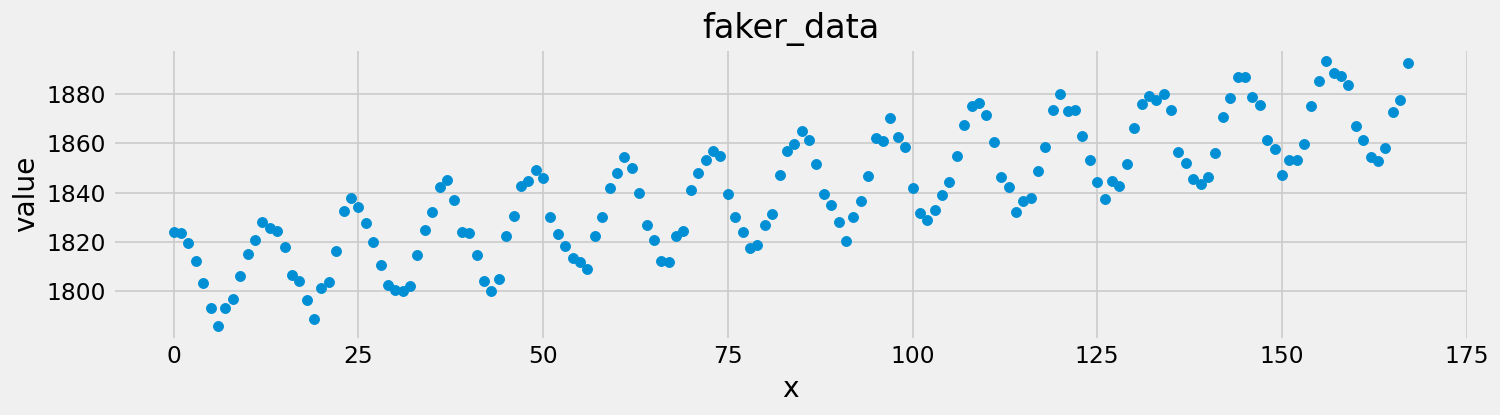

In [304]:
# 把原始数据画出来
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(13, 3), dpi=120)
    ax.scatter(faker_data['x'], faker_data['value'])
    ax.set_title("faker_data")
    ax.set_xlabel("x")
    ax.set_ylabel("value")

看上面的数据，有明显的趋势性和周期性。可以估计一个函数的样式如下：
$y = A + B*x + C * sin(D*x * pi + E)$

然后设置我们的损失函数，就拿最简单的mse来做loss函数。
$loss_mse = mean((pred - y_{real})^2)$

In [308]:
params0 = [0, 0, 0, 0, 0]  # 设置一个初始化参数，用来等待模拟。


def loss_function(params):
    """
    损失函数
    params = [A, B, C, D, E]
    """
    real_x = faker_data['x'].values
    real_y = faker_data['value'].values
    small_function = lambda x: params[0] + params[1] * x + params[2] * np.sin(params[3] * x * np.pi + params[4])
    predict = small_function(real_x)
    result = np.mean((predict - real_y) ** 2)
    return result


# minimize就是优化器，让我们的loss_function的值越来越小。

res = minimize(fun=loss_function, x0=params0, method='powell')  # nelder-mead powell
res

   direc: array([[ 7.98962208e-03,  3.35217291e-04,  2.87708715e+00,
        -8.80126436e-04,  3.09487738e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-2.68131411e+01,  2.40043881e-01, -7.01744372e-01,
         2.56896248e+00,  2.91153007e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 2.65377276e-03,  1.76170193e-04, -9.03222601e-01,
        -2.17574613e-04,  7.70754721e-02]])
     fun: 7.865991687818708
 message: 'Optimization terminated successfully.'
    nfev: 648
     nit: 9
  status: 0
 success: True
       x: array([1.80548862e+03, 4.26128012e-01, 2.05247374e+01, 4.16659624e+00,
       1.26359705e+00])

In [309]:
res.x  # 预测的参数 # 返回预测的参数

array([1.80548862e+03, 4.26128012e-01, 2.05247374e+01, 4.16659624e+00,
       1.26359705e+00])

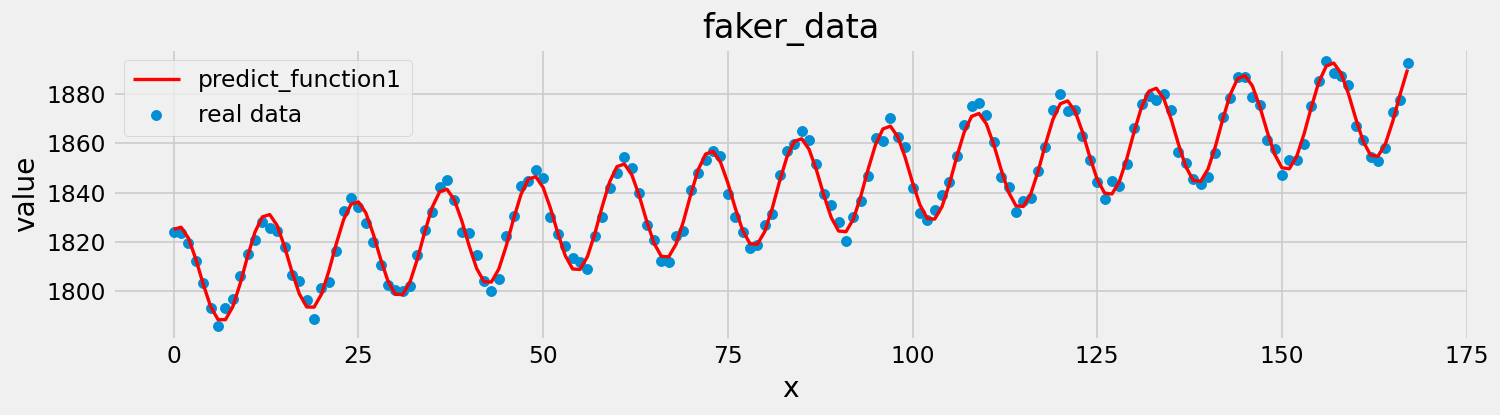

In [310]:

params = res.x
predict_function1 = lambda x: params[0] + params[1] * x + params[2] * np.sin(
    params[3] * x * np.pi + params[4])  # 这个是我们要构造的目标函数

predict_value1 = faker_data['x'].apply(lambda x: predict_function1(x))  # 计算预测值

# 还有些内容，我没计算，先不算了
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(13, 3), dpi=120)
    ax.plot(faker_data['x'], predict_value1, label='predict_function1', color='red', alpha=1, linewidth=2)
    ax.scatter(faker_data['x'], faker_data['value'], label='real data')
    ax.set_title("faker_data")
    ax.set_xlabel("x")
    ax.set_ylabel("value")
    ax.legend()